In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon # to create patches
import sympy as sp # python library for symbolic mathematics
import scipy.stats as stats # for statistical functions
from scipy import interpolate 

In [5]:
# define global figure properties

import matplotlib_inline.backend_inline
# display figues in vector format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# parameter changes
plt.rcParams.update({'font.size':14,
                     'axes.titlelocation': 'left',
                     'axes.spines.right': False,
                     'axes.spines.top': False})

### Figure 3.2: The math of the heart. 

Plotting equation 3.1: $(x^2 + y^2 - 1)^3 = x^2y^3 = 0$

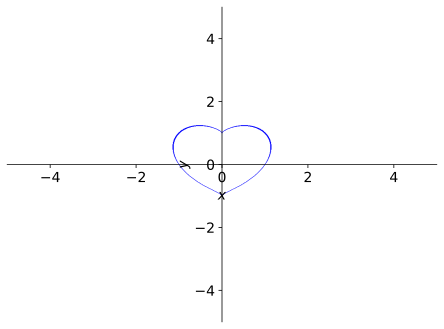

In [6]:
# transform strings 'x' and 'y' to instances of sympy Symbol class and assign them to variables x and y
x,y = sp.symbols('x,y')

# define the expression for the implicit function
expr = (x**2 + y**2 - 1)**3 - x**2 * y**3

# output
h = sp.plot_implicit(expr, show=True) # change the show parameter to False if you want to just get the output without displaying the figure


for grabbing midpoints of intervals, `h[0].get_data()` method is available which returns the intervals. 

In [7]:
# grab midpoints of intervals and plot these
data = np.array([(x_int.mid, y_int.mid) for x_int, y_int in h[0].get_data()[0]]) 

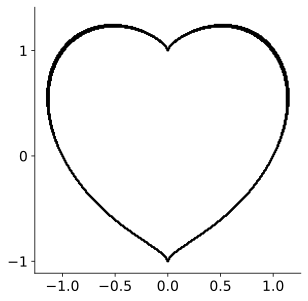

In [8]:
# plot
plt.plot(data[:,0],data[:,1], 'k.', markersize=2)
plt.yticks([-1,0,1])
plt.axis('square')

# display the figure
plt.show()

### Figure 3.3: Bar plot of news sources

In [10]:
# bar heights and labels
news_sources = [40,10,85,20]
source_labels = ['TV', 'Newspapers', 'Internet', 'Word of mouth']

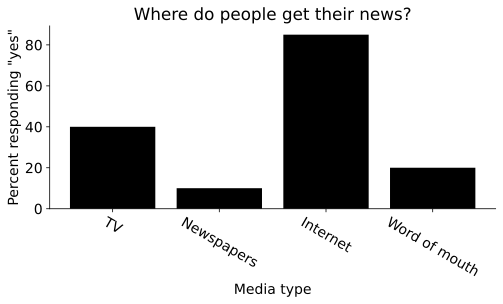

In [11]:
# plot

# using dimensions from the original figure
fig, ax = plt.subplots(figsize=(8,3.3))

# plotting the bars
ax.bar(source_labels, news_sources, color='black')

# adding the labels
ax.set_title('Where do people get their news?', loc='center')
ax.set_xlabel('Media type')
ax.set_ylabel('Percent responding "yes"')
plt.xticks(rotation=-30)

# display the figure
plt.show()

Whooohoo!

### Figure 3.4: an example bar plot

In [12]:
Y = [1, 4, 3, 9] # heights
X = [0, 1, 3, 4] # locations

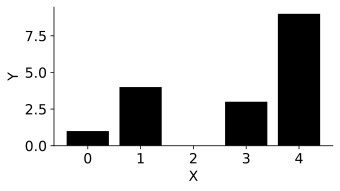

In [13]:
# plot

# take the dimensions from the original figure
fig, ax = plt.subplots(figsize=(5,2.5))

# plotting the bars
ax.bar(X, Y, color='black')

# adding the labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# display the figure
plt.show()

### Fig 3.5: Grouped bar plots

In [15]:
news_sources = np.array([[12, 17, 95, 35],
                         [90, 40, 50, 25]])
agegroups = ['Millenials', 'Boomers']

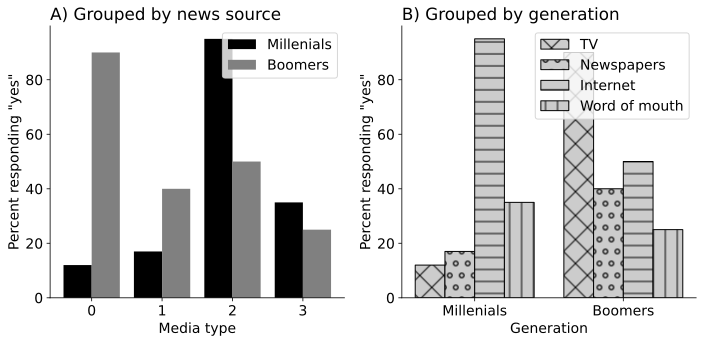

In [16]:
# plots
_, axs = plt.subplots(1,2, figsize=(10,5))

# plot the first bar chart
axs[0].bar(np.arange(4)-0.2, news_sources[0], width=0.4, color= 'black')
axs[0].bar(np.arange(4)+0.2, news_sources[1], width=0.4, color= 'gray')
axs[0].set(xlabel='Media type', ylabel='Percent responding "yes"', xticks=np.arange(4))
axs[0].legend(agegroups, loc='upper right')
axs[0].set_title(r'A) Grouped by news source')

# offset the second bar chart
offset = [-0.3, -0.1, 0.1, 0.3]
hatches = 'xo-|' # "hatch" is the fill pattern
for i in range(4):
    axs[1].bar(np.arange(2)+offset[i], news_sources[:,i], width=0.2, color=[0.8,0.8,0.8], hatch=hatches[i], edgecolor='k')

# make them colorful if you don't require grayscale
# for i in range(4):
#     axs[1].bar(np.arange(2)+offset[i], news_sources[:,i], width=0.2, hatch=hatches[i])

# plot the second bar chart
axs[1].set(xlabel='Generation', ylabel='Percent responding "yes"', xticks=np.arange(2))
axs[1].set_xticklabels(agegroups)
axs[1].legend(source_labels, loc='upper right')
axs[1].set_title(r'B) Grouped by generation')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.6: Bar charts and matrices

How a grouped bar chart is made from a matrix of numbers: in python `plt.bar()` groups bars by rows, such that columns within a row will have adjacent bars, while each row will be separated by a blank space on the x axis. thus, grouping bars the other way is done by transposing the data matrix to swap rows and columns.  (in R, you can create a new dataframe using the `mutate()` function.)

In [12]:
# data: observations (rows) and features (columns)
m = [[10,12,90,35],
     [85,15,50,10]]

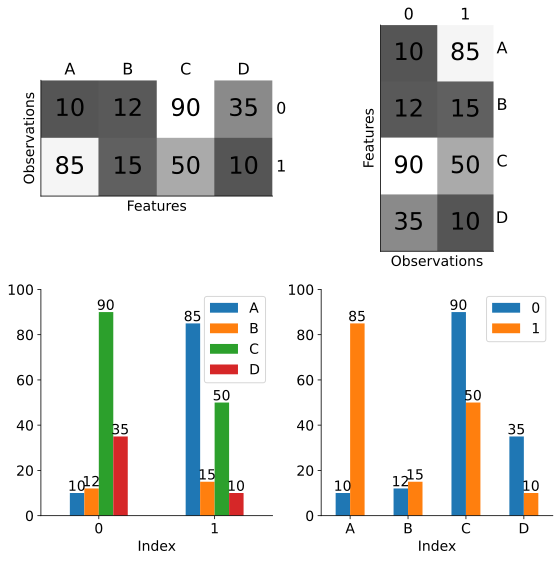

In [13]:
# Plot

# take the dimensions from the original figure
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

### Images

# show the data as an image
ax[0,0].imshow(m, cmap='gray', vmin=-30, vmax=90)

# add numerical labels
for i in range(len(m)):
    for j in range(len(m[0])):
        ax[0,0].text(j,i,m[i][j], fontsize=24, ha='center', va='center')
ax[0,0].set(xticks=[], yticks=[], xlabel='Features', ylabel='Observations')

# now the other orientation (features and observations swapped)

# show the data as an image
ax[0,1].imshow(np.array(m).T, cmap='gray', vmin=-30, vmax=90)

# add numerical labels
for i in range(len(m)):
    for j in range(len(m[0])):
        ax[0,1].text(i,j,m[i][j], fontsize=24, ha='center', va='center')
ax[0,1].set(xticks=[], yticks=[], xlabel='Observations', ylabel='Features')

# add text/ number indices to rows/columns in the images
for i,l in zip(range(4),'ABCD'):
  ax[0,0].text(i,-.6,l,ha='center',fontsize=16)
  ax[0,1].text(1.65,i,l,ha='center',fontsize=16)

for i in range(2):
  ax[0,0].text(3.65,i,str(i),va='center',ha='center',fontsize=16)
  ax[0,1].text(i,-.6,str(i),ha='center',fontsize=16)

### Bar plots

df = pd.DataFrame(m, columns=['A', 'B', 'C', 'D'])

# plot 1
h = df.plot(ax=ax[1,0], kind='bar', rot=0)
ax[1,0].set_ylim([0,100])

# add text labels
for p in h.patches:
    h.annotate(p.get_height(), [p.get_x()+0.06, p.get_height()+1], ha ='center', fontsize=14)

# set the x-axis labels
ax[1,0].set_xlabel('Index')

# plot 2
h = df.T.plot(ax=ax[1,1], kind='bar', rot=0)
ax[1,1].set_ylim([0,100])

# add text labels
for p in h.patches:
    h.annotate(p.get_height(), [p.get_x()+0.12, p.get_height()+1], ha ='center', fontsize=14)

# set the x-axis labels
ax[1,1].set_xlabel('Index')

# display the figure
plt.tight_layout()
plt.show()


Importantly, *the data are exactly the same*, but the interpretation of the results differs. And neither representation is correct or incorrect.

### Fig 3.8: Pie chart

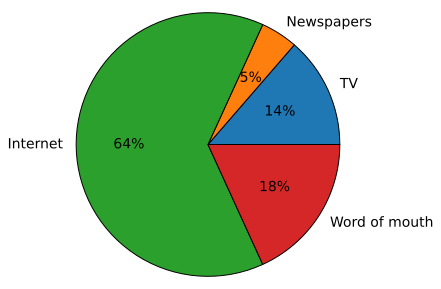

In [14]:
# data
most_news = [15,5,70,20]

# Plot (using dimensions from the original figure)
fig, ax = plt.subplots(figsize=(6.3,6.3))

# plotting the pie
ax.pie(most_news, labels=source_labels, autopct='%0.0f%%', radius=1.2, wedgeprops={'edgecolor':'k'})

# display the figure
plt.tight_layout()
plt.show()

### fig 3.9: Box plot

In [15]:
# random data with an outlier
data = np.random.randn(100)
data[data>2] = 1
data[data<-2] = -1
data[-1] = 3 # force one outlier

data

array([-4.27486815e-01, -9.28633763e-01,  3.74402929e-02,  6.71323449e-01,
        1.06319611e+00, -1.31944542e+00, -1.42339000e+00,  3.53648347e-01,
        1.26079441e+00,  9.42352737e-01,  6.73132825e-01,  1.61920931e+00,
        1.83232450e-01,  1.71493778e+00,  1.83528312e+00, -5.67501461e-01,
        4.39718415e-01, -1.71535014e-02,  6.37141456e-01, -1.32605560e+00,
       -1.42537210e+00, -5.38709324e-02, -8.69044981e-01,  5.65882994e-01,
       -8.50717284e-01,  8.59756889e-01, -2.07969703e-01, -5.32597020e-01,
        5.66878671e-01, -7.18244683e-01,  9.25267797e-02,  1.39196702e-01,
       -1.71493328e+00,  1.39591158e+00, -1.12402204e+00, -1.11988098e+00,
       -7.47816883e-02,  7.61342175e-01, -1.02413945e+00, -1.01249761e+00,
        7.79593023e-01,  1.43456206e-02,  8.89193127e-01, -6.68060766e-01,
        5.65152922e-01, -1.10956350e+00, -1.06948932e+00,  5.00719195e-01,
       -3.02912734e-01, -1.95073458e-01, -7.13132647e-01, -8.27686230e-01,
        1.87923929e+00,  

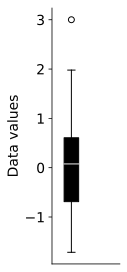

In [16]:
# plot

fig, ax = plt.subplots(figsize=(2,4))

h = plt.boxplot(data, patch_artist=True)
h['boxes'][0].set(color='k')
h['medians'][0].set(color='w')

plt.xlim([0.8, 1.5])
plt.xticks([])
plt.ylabel('Data values')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.10: Box plots for distribution characteristics

In [17]:
# data 
data = np.hstack((np.random.normal(loc=100, size=(200,1), scale=10),
                 np.random.normal(loc=100, size=(200,1), scale=2)))


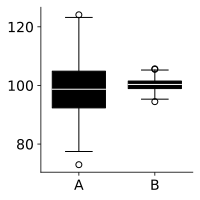

In [18]:
# boxplot
plt.figure(figsize=(3,3))
h = plt.boxplot(data, patch_artist=True, widths=0.7)
for (b,m) in zip(h['boxes'], h['medians']):
    b.set(color='k')
    m.set(color='w')

plt.xlim([0.5, 2.5])
plt.xticks(range(1,3), ['A', 'B'])
 
# display the figure
plt.tight_layout()
plt.show()

### Fig 3.11: Histogram

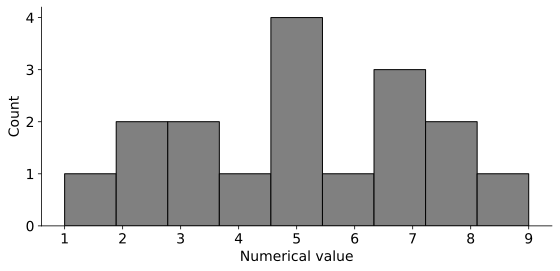

In [19]:
X = [1,2,2,3,3,4,5,5,5,5,6,7,7,7,8,8,9]

# histogram
plt.figure(figsize=(8,4))
plt.hist(X, bins=len(set(X)), color='gray', edgecolor='k')

# add the labels and ticks
plt.xticks(np.arange(np.min(X), np.max(X)+1))
plt.xlabel('Numerical value')
plt.ylabel('Count')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.12: Appropriate binning in histograms

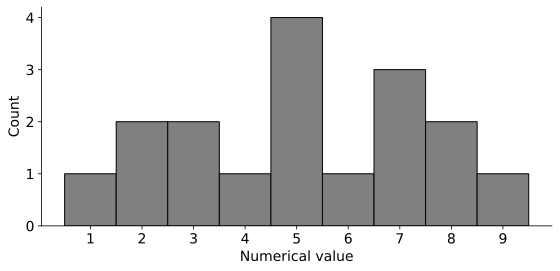

In [20]:
# the above histogram with a different binning
plt.figure(figsize=(8,4))
plt.hist(X, bins=np.arange(0.5,9.51,step=1), color='gray', edgecolor='k')

# add the labels and ticks
plt.xticks(np.arange(np.min(X), np.max(X)+1))
plt.xlabel('Numerical value')
plt.ylabel('Count')

# display the figure
plt.tight_layout()
plt.show()

In [21]:
# the table of bin boundaries
_, x1 = np.histogram(X, bins=len(set(X)))
_, x2 = np.histogram(X, bins=np.arange(0.5,9.51,step=1))

for i in range(len(x1)-1):
    print(f'Bin {i+1}: [{x1[i]:.2f} to {x1[i+1]:.2f}]    [{x2[i]:.2f} to {x2[i+1]:.2f}]')

Bin 1: [1.00 to 1.89]    [0.50 to 1.50]
Bin 2: [1.89 to 2.78]    [1.50 to 2.50]
Bin 3: [2.78 to 3.67]    [2.50 to 3.50]
Bin 4: [3.67 to 4.56]    [3.50 to 4.50]
Bin 5: [4.56 to 5.44]    [4.50 to 5.50]
Bin 6: [5.44 to 6.33]    [5.50 to 6.50]
Bin 7: [6.33 to 7.22]    [6.50 to 7.50]
Bin 8: [7.22 to 8.11]    [7.50 to 8.50]
Bin 9: [8.11 to 9.00]    [8.50 to 9.50]


### Fig 3.14: Histogram of mongoose lengths

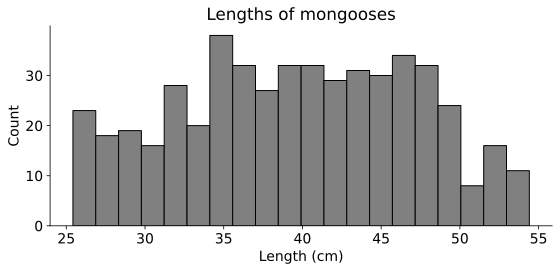

In [22]:
# distribution of mongooses' length
mongooses = np.arctanh(np.random.uniform(-0.75,0.75,size=500)) * 15 + 40

# histogram
plt.figure(figsize=(8,4))
plt.hist(mongooses, bins=20, color='gray', edgecolor='k') # changes bin number

# add the labels 
plt.xlabel('Length (cm)')
plt.ylabel('Count')
plt.title('Lengths of mongooses', loc='center')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.15: Histograms with different bins

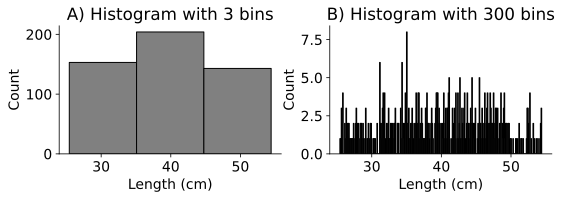

In [23]:
# create two subplots
_, axs = plt.subplots(1,2, figsize=(8,3))

# plot the first histogram
axs[0].hist(mongooses, bins=3, color='gray', edgecolor='k')
axs[0].set_title(r'A) Histogram with 3 bins', loc='center')

# plot the second histogram
axs[1].hist(mongooses, bins=300, color='gray', edgecolor='k')
axs[1].set_title(r'B) Histogram with 300 bins', loc='center')

# stylizing
for a in axs:
    a.set_xlabel('Length (cm)')
    a.set_ylabel('Count')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.16: Distribution showing tails

In [24]:
# create a Gaussian probability curve
x = np.linspace(-4, 4, 401)
gpdf = stats.norm.pdf(x)

# finding the indicees of the 2.5% and 97.5%
lbndi = np.argmin(np.abs(x-stats.norm.ppf(0.05)))
ubndi = np.argmin(np.abs(x-stats.norm.ppf(0.95)))

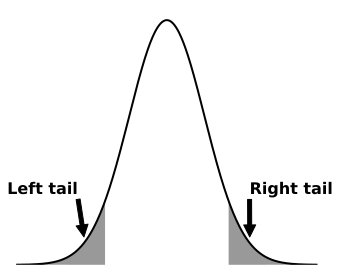

In [25]:
# plot the probability function and the vertical lines
_, ax = plt.subplots(1, figsize=(5,4))
ax.plot(x, gpdf, 'k', linewidth=2)
ax.set(xlim=x[[0,-1]], ylim=[0,0.42], xticks=[], yticks=[], 
       xlabel='Data values', ylabel='Proportion')


# creating patches for the rejected area
dots = np.zeros((lbndi+2,2))
for i in range(lbndi+1):
    dots[i,:] = x[i], gpdf[i]
dots[-1,:] = x[lbndi], 0
ax.add_patch(Polygon(dots, facecolor='k', alpha=0.4))

# repeat for the right lobe
dots = np.zeros((len(x)-ubndi+1,2))
for i in range(ubndi, len(x)):
    dots[i-ubndi,:] = x[i], gpdf[i]
dots[-1,:] = x[ubndi], 0
ax.add_patch(Polygon(dots, facecolor='k', alpha=0.4))

# annotate the figure
tailx = np.argmin(np.abs(x+2.2))
ax.annotate('Left tail', xy=(x[tailx], gpdf[tailx]+0.01),
            xytext=(x[tailx]-1.1, gpdf[tailx]+0.08), ha='center', 
            arrowprops={'color': 'k'}, weight='bold', size=16)
tailx = np.argmin(np.abs(x-2.2))
ax.annotate('Right tail', xy=(x[tailx], gpdf[tailx]+0.01),
            xytext=(x[tailx]+1.1, gpdf[tailx]+0.08), ha='center', 
            arrowprops={'color': 'k'}, weight='bold', size=16)

# display the figure
ax.axis('off')
plt.tight_layout()
plt.show()

### Fig 3.17: Histogram raw counts vs proportion

In [26]:
# data
data = np.random.rand(200)**2

# extract histogram data
counts, x = np.histogram(data, bins='fd') # fd = Freedman-Diaconis rule
bin_cents = (x[:-1] + x[1:]) / 2

# convert counts to proportions
proportion = counts / np.sum(counts)
proportion 

array([0.42 , 0.2  , 0.095, 0.08 , 0.125, 0.08 ])

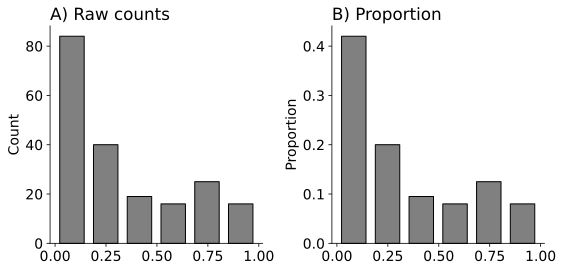

In [27]:
# plot
_, axs = plt.subplots(1,2,figsize=(8,4))

# plot the bar chart
axs[0].bar(bin_cents, counts, width=0.12, color='gray', edgecolor='k')
axs[0].set_title(r'A) Raw counts')
axs[0].set_ylabel('Count')

axs[1].bar(bin_cents, proportion, width=0.12, color='gray', edgecolor='k')
axs[1].set_title(r'B) Proportion')
axs[1].set_ylabel('Proportion')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.19: The mongooses experiment

In [28]:
# data 
mongooses_africa = np.arctanh(np.random.uniform(size=100)*1.5-0.75)*12 + 37
mongooses_asia = np.arctanh(np.random.uniform(size=500)*1.5-0.75)*15 + 42

# create common bin boundaries across both datasets
alldata = np.concatenate((mongooses_africa, mongooses_asia))
bins = np.linspace(np.min(alldata), np.max(alldata), 30)

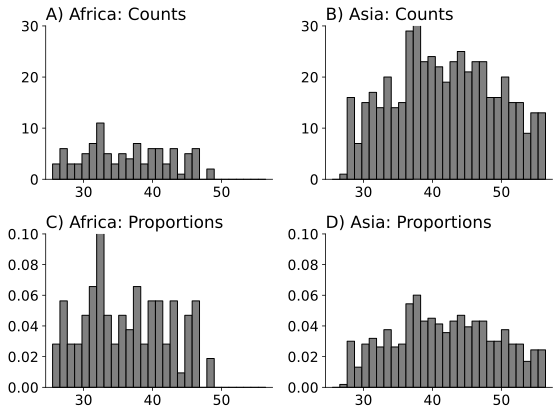

In [29]:
# Plot
_, axs = plt.subplots(2,2, figsize=(8,6))

# top two panels showing raw histograms
axs[0,0].hist(mongooses_africa, bins=bins, color='gray', edgecolor='k')
axs[0,0].set_xlim([bins[0]-1, bins[-1]+1])
axs[0,0].set_ylim([0,30])
axs[0,0].set_title(r'A) Africa: Counts')

axs[0,1].hist(mongooses_asia, bins=bins, color='gray', edgecolor='k')
axs[0,1].set_xlim([bins[0]-1, bins[-1]+1])
axs[0,1].set_ylim([0,30])
axs[0,1].set_title(r'B) Asia: Counts')

# bottom two panels for proportions
axs[1,0].hist(mongooses_africa, bins=bins, color='gray', edgecolor='k', density=True)
axs[1,0].set_xlim([bins[0]-1, bins[-1]+1])
axs[1,0].set_ylim([0,0.1])
axs[1,0].set_title(r'C) Africa: Proportions')

axs[1,1].hist(mongooses_asia, bins=bins, color='gray', edgecolor='k', density=True)
axs[1,1].set_xlim([bins[0]-1, bins[-1]+1])
axs[1,1].set_ylim([0,0.1])
axs[1,1].set_title(r'D) Asia: Proportions')

# display the figure
plt.tight_layout()
plt.show()

### Fig 3.21: Violin plot from histogram

In [30]:
# data
x1 = np.random.randn(100)-0.5
x2 = np.random.randn(100)+0.5
X = np.concatenate((x1,x2))

/tmp/ipykernel_67919/1038589462.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['distr'][:len(df)] = 'x1' # note: you can safely ignore the warning that this line produces


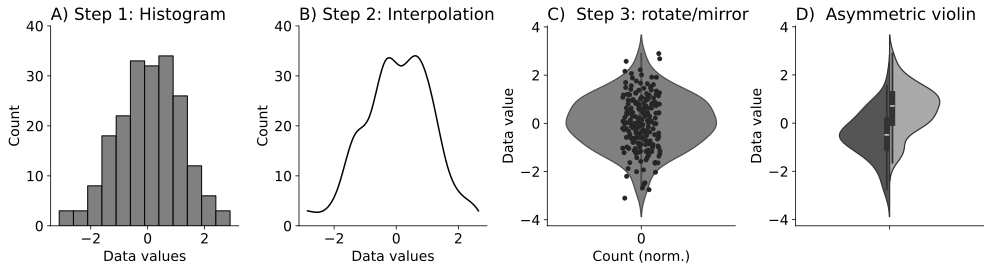

In [31]:
# plot
_, axs = plt.subplots(1,4, figsize=(14,4))

# regular histogram
axs[0].hist(X, bins='fd', color='gray', edgecolor='k')
axs[0].set_title(r'A) Step 1: Histogram')
axs[0].set_ylim([0,40])
axs[0].set_xlabel('Data values')
axs[0].set_ylabel('Count')

# smooth interpolation of histogram
y, x = np.histogram(X, bins='fd')
x = (x[:-1] + x[1:]) / 2

interpF = interpolate.interp1d(x, y, kind='cubic')
xx = np.linspace(x[0], x[-1], 100)
yy = interpF(xx)

axs[1].plot(xx, yy, 'k')
axs[1].set_xlabel('Data values')
axs[1].set_ylabel('Count')
axs[1].set_ylim([0,40])
axs[1].set_title(r'B) Step 2: Interpolation')

# violin plot (as a dataframe to use seaborn)
df = pd.DataFrame(X)
sns.violinplot(data=df,palette='gray',ax=axs[2])
sns.stripplot(data=df,ax=axs[2],palette='dark:#b2b2b2')
axs[2].set_xlabel('Count (norm.)')
axs[2].set_ylabel('Data value')
axs[2].set_title(r'C)  Step 3: rotate/mirror')


df = pd.DataFrame(np.vstack((x1,x2)).T,columns = ['x1','x2'])
df_all = pd.DataFrame( pd.concat((df['x1'],df['x2']),axis=0),columns=['y'])
df_all['distr'] = 'x2'
df_all['distr'][:len(df)] = 'x1' # note: you can safely ignore the warning that this line produces
df_all[''] = ' '
sns.violinplot(data=df_all,x='',y='y',palette='gray',ax=axs[3],split=True,hue='distr')
axs[3].legend_.remove()
axs[3].set(xlim=[-.75,.75],ylabel='Data value')
axs[3].set_title(r'D)  Asymmetric violin')


plt.tight_layout()
plt.show()

### fig 3.22: Linear vs logarithmic plot

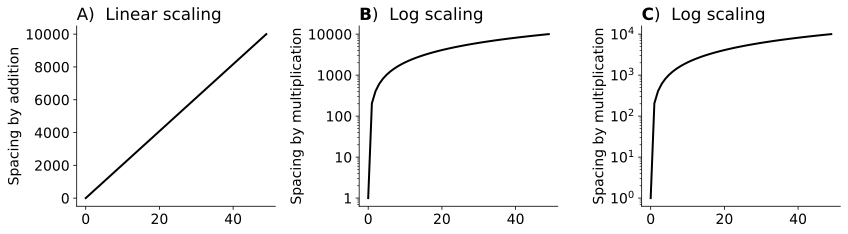

In [32]:
# data (a line)
y = np.linspace(1,10**4)

# create a figure
_,axs = plt.subplots(1,3,figsize=(12,3.5))

# visualization
for i in range(3):

  # plot the line (same data in all plots!)
  axs[i].plot(y,'k',linewidth=2)

  # adjust the axes for the log plots
  if i>0:
    axs[i].set_yscale('log')
    t = r'$\bf{' + ['B','C'][i-1] + '}$)  Log scaling'
    axs[i].set_title(t)
    axs[i].set_ylabel('Spacing by multiplication')



# log scaling is in scientific notation by default;
# here I change it to scalar format.
from matplotlib.ticker import ScalarFormatter
axs[1].yaxis.set_major_formatter(ScalarFormatter())

# labels
axs[0].set_title(r'A)  Linear scaling')
axs[0].set_ylabel('Spacing by addition')


plt.tight_layout()
plt.show()

### Fig 3.24: Radial plots

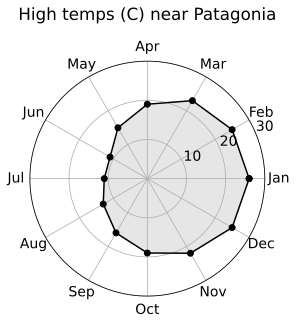

In [33]:
# data (from website: https://www.timeanddate.com/weather/%403841798/climate)
tempC = [ 26,25,23,19,15,11,11,13,16,19,22,25 ]
months = [ 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]

# angles for plotting
theta = np.linspace(0,2*np.pi,len(months)+1)

# repeat first data point so the line wraps around
tempC.append(tempC[0])


## draw the data
ax = plt.subplot(111,polar=True)
ax.plot(theta,tempC,'ko-')
ax.fill(theta,tempC,'k',alpha=.1)

# make the plot look nicer
ax.set_xticks(theta[:-1])
ax.set_xticklabels(months)
ax.set_yticks([10,20,30])
ax.set_ylim([0,30])
ax.set_title('High temps (C) near Patagonia',y=1.15,loc='center')

# display the figure
plt.tight_layout()
plt.show()
     

### Fig 3.25: When not to use a radial plot

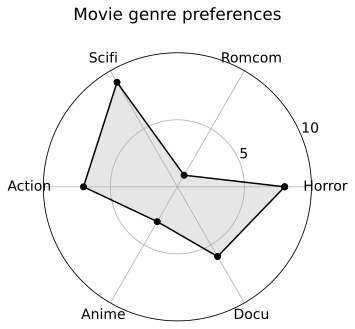

In [34]:
# data
data = {
    'Horror' : 8 ,
    'Romcom' : 1 ,
    'Scifi'  : 9 ,
    'Action' : 7 ,
    'Anime'  : 3 ,
    'Docu'   : 6
}

# angles for plotting
theta = np.linspace(0,2*np.pi,len(data)+1)

# repeat first data point so the line wraps around
ratings = list(data.values())
ratings.append(ratings[0])

## draw the data
ax = plt.subplot(111,polar=True)
ax.plot(theta,ratings,'ko-')
ax.fill(theta,ratings,'k',alpha=.1)

# make the plot look nicer
ax.set_xticks(theta[:-1])
ax.set_xticklabels(data.keys())
ax.set_yticks([5,10])
ax.set_ylim([0,10])
ax.set_title('Movie genre preferences',y=1.1,loc='center')


plt.tight_layout()
plt.show()